<a href="https://colab.research.google.com/drive/1AEz0hsHxoyU41P2UkD90SALsPuQHOYZi?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg"  height="30"  alt="Open In Colab"/></a>

# **Data Pre-Processing**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

**Import the CSV Data as Pandas DataFrame**

In [3]:
df = pd.read_csv("/content/covertype.csv")
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,1,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,1,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,1,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,1,0,3


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

## Data Cleaning
#### Checking features with nan value

In [9]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(df[feature].isnull().mean())

**Handling Duplicates**

In [10]:
df.duplicated().sum()

np.int64(0)

# **Feature Engineering**
### Type of Features
**Numeric Features**

In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of numerical variables: ', len(numeric_features))

Number of numerical variables:  55


**Categorical Features**

In [13]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of categorical variables: ', len(categorical_features))

Number of categorical variables:  0


**Discrete Features**

In [14]:
descret_features = [feature for feature in numeric_features if len(df[feature].unique())<25]
print('Number of discrete variables: ', len(descret_features))

Number of discrete variables:  45


**Continuous features**

In [15]:
cont_features = [feature for feature in numeric_features if len(df[feature].unique())>=25]
print('Number of continuous variables: ', len(cont_features))

Number of continuous variables:  10


### Check Outlier and Capping it
**Why outliers?**
* Data Entry error : Human error.
* Measurement error: Instrument error.
* Natural error: it will be Real life data.
* Intentional error: People give wrong inputs

**Impact of Outliers ?**
* Ouliers can very high impact on few Machine learning models.
* Can Cause bias in the output.

**Checking Outliers in Continuous features**

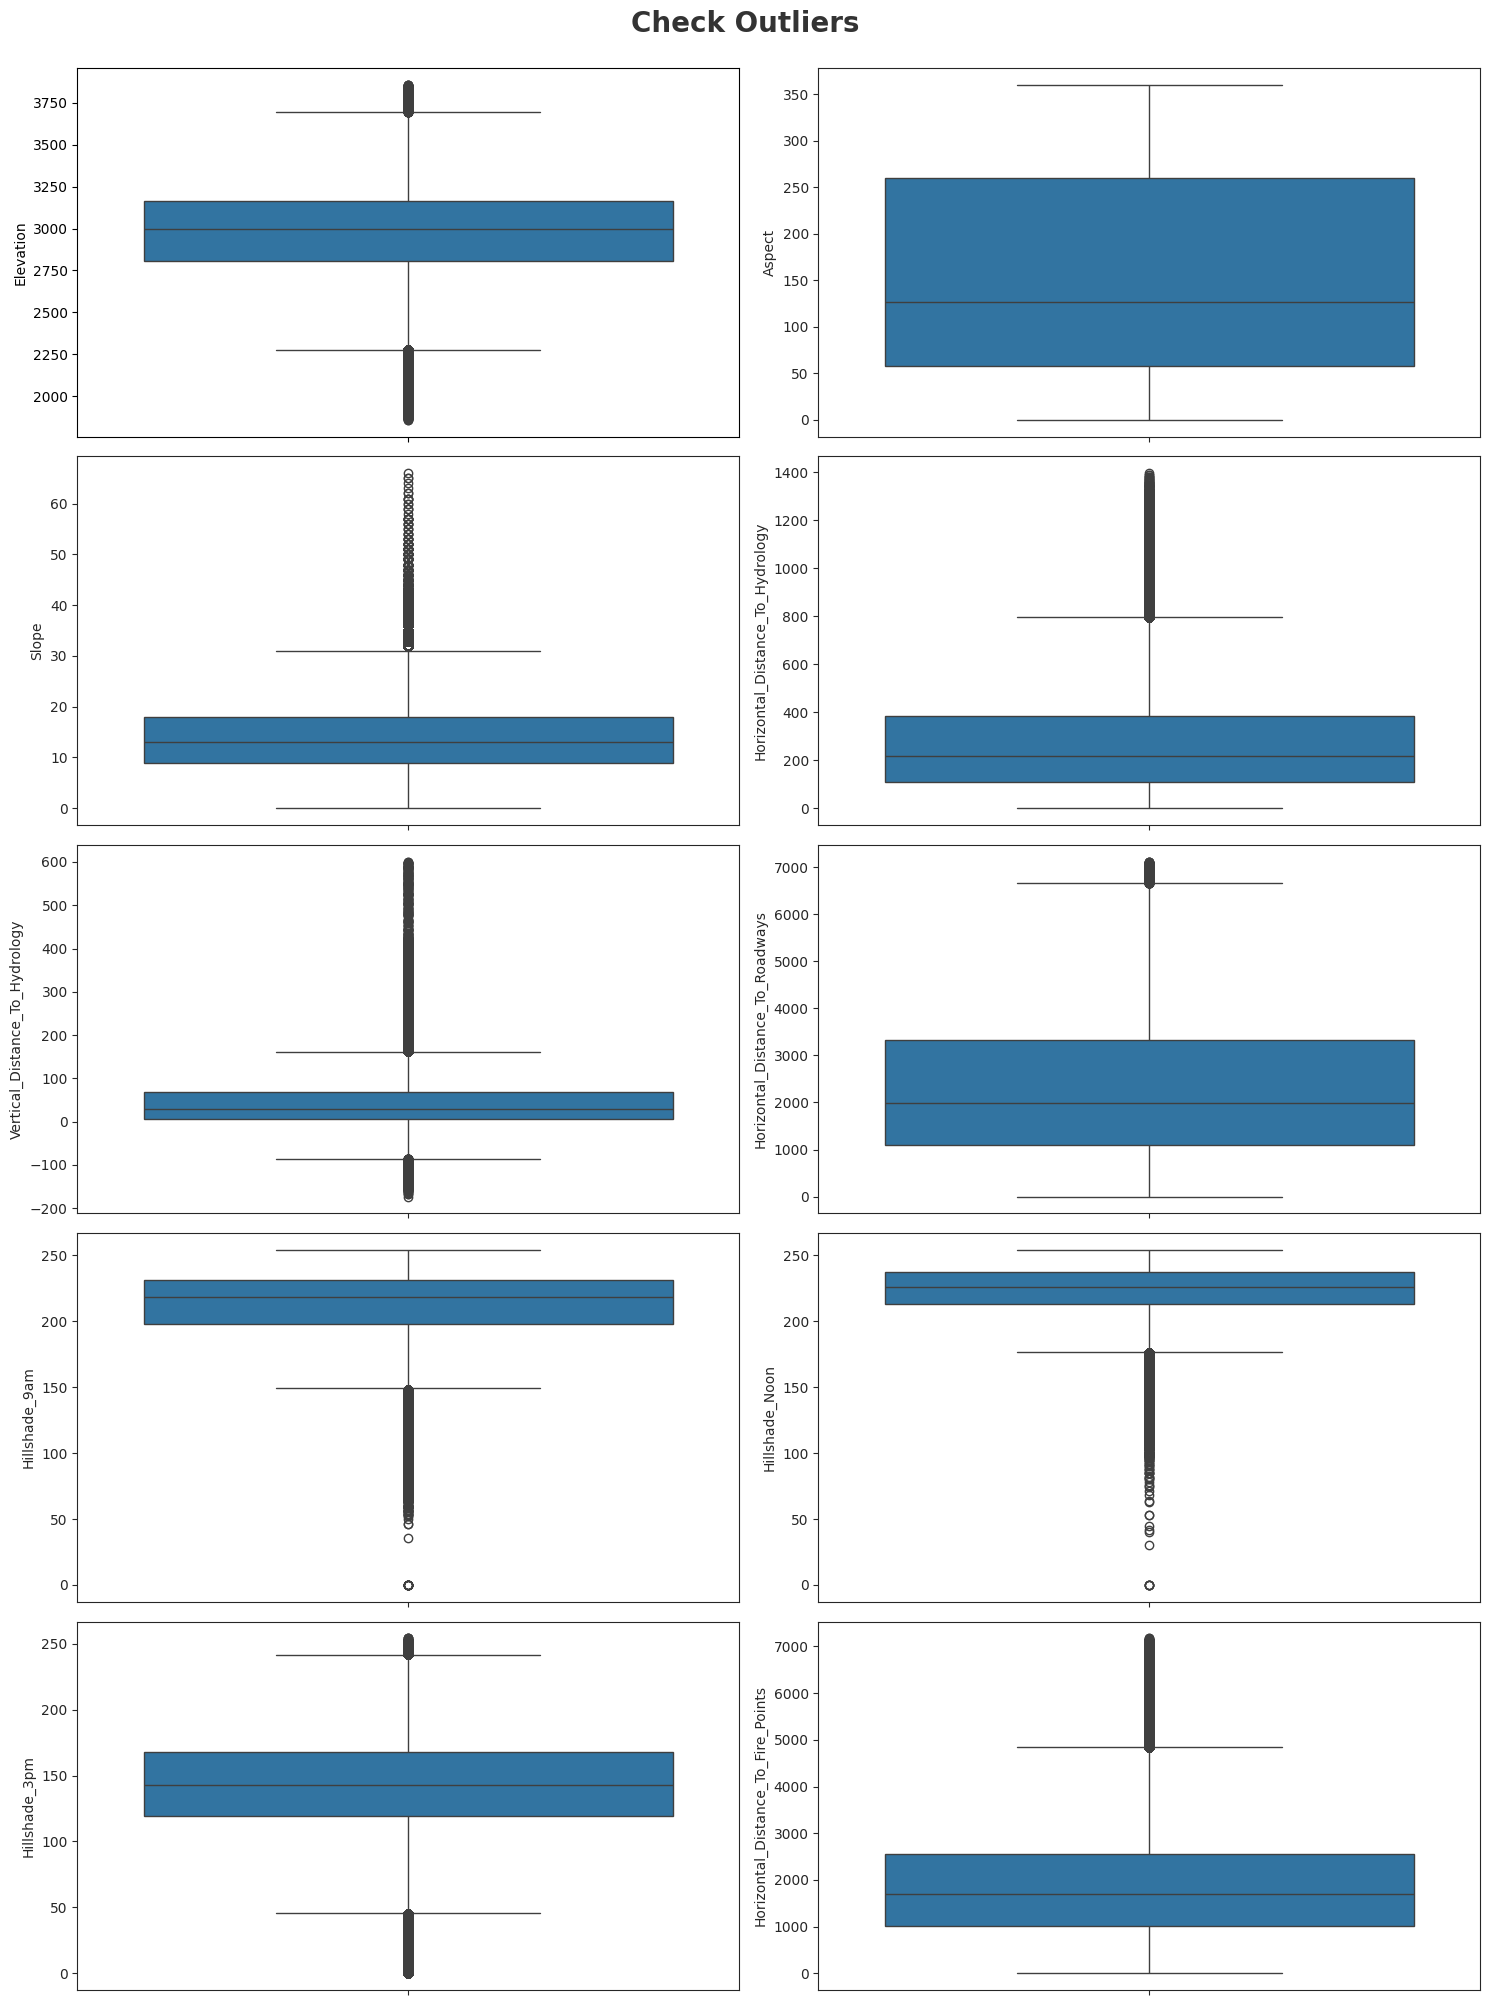

In [16]:
plt.figure(figsize=(15, 20))
plt.suptitle('Check Outliers', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cont_features)):
    plt.subplot(5, 2, i+1)
    sns.set_style('ticks')
    sns.boxplot(df[cont_features[i]])
    plt.tight_layout()

#### Insight
- Except 'Aspect' rest all other 9 continuous features has outliers.

**Clipping the outliers**

In [17]:
df_copy = df.copy()
def detect_and_capping_outliers(col):
    # Finding the IQR
    percentile25 = df_copy[col].quantile(0.25)
    percentile75 = df_copy[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df_copy.loc[(df[col]>upper_limit), col]= upper_limit
    df_copy.loc[(df[col]<lower_limit), col]= lower_limit
    return df_copy

In [18]:
for col in cont_features:
      detect_and_capping_outliers(col)

**Visualize again**

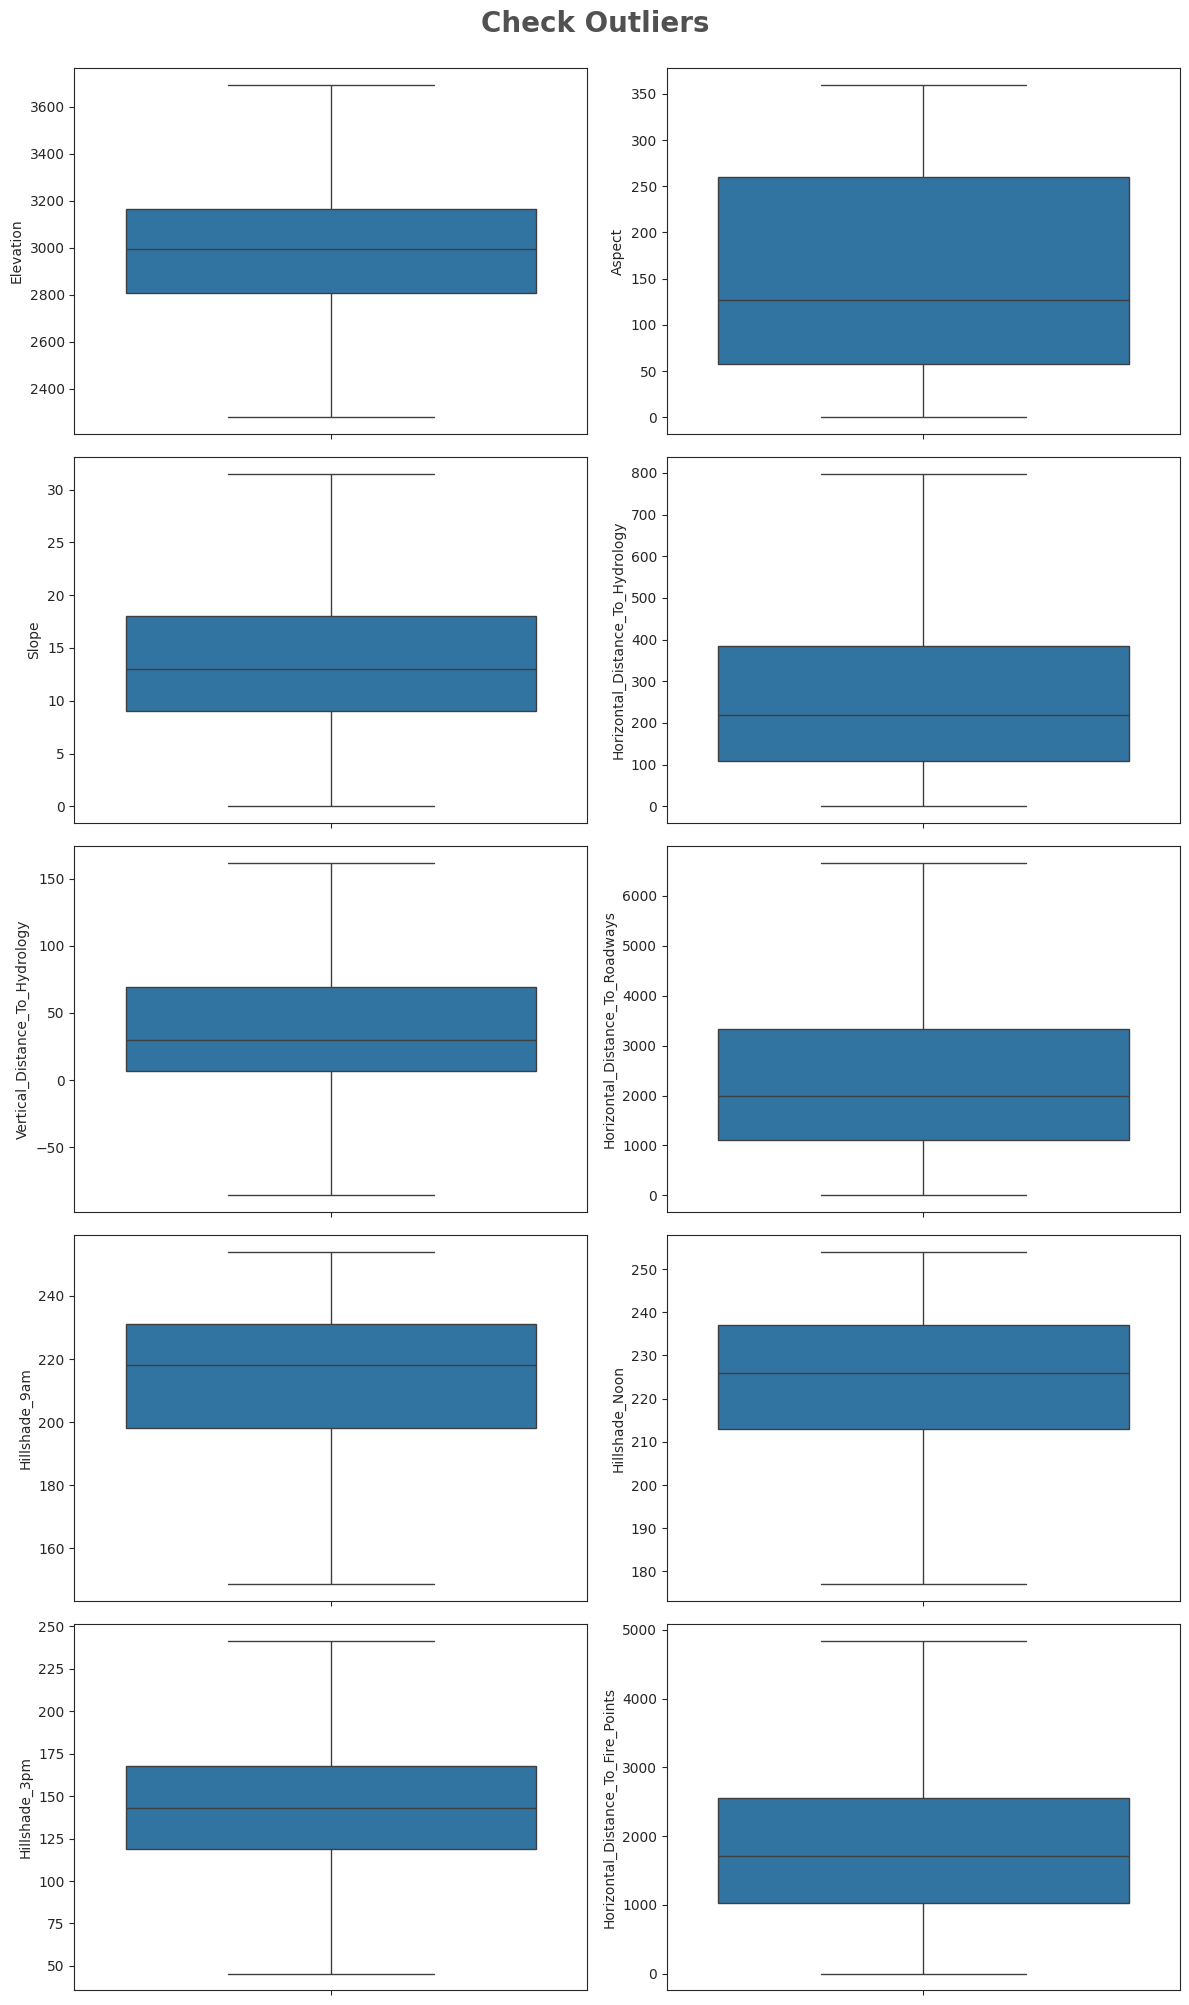

In [25]:
plt.figure(figsize=(12, 20))
plt.suptitle('Check Outliers', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cont_features)):
    plt.subplot(5, 2, i+1)
    sns.set_style('ticks')
    sns.boxplot(df_copy[cont_features[i]])
    plt.tight_layout()

In [26]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4

In [27]:
def split_numbers_chars(row):
    '''This function fetches the numerical characters at the end of a string
    and returns alphabetical character and numerical charcters respectively'''
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [28]:
# reverse the onde hot encoded for soil_type in df_copy
reverse_one_hot_encode(df_copy, 14, 56, "Soil_Type")

In [34]:
wilderness_areas = ['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']
feature_names = cont_features + wilderness_areas + ["Soil_Type"] + ["Cover_Type"]
all_features_df = df_copy[feature_names]
all_features_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type,Cover_Type
0,2596,51,3.0,258,0,510,221.0,232,148.0,4839,1,0,0,0,29,5
1,2590,56,2.0,212,-6,390,220.0,235,151.0,4839,1,0,0,0,29,5
2,2804,139,9.0,268,65,3180,234.0,238,135.0,4839,1,0,0,0,12,2
3,2785,155,18.0,242,118,3090,238.0,238,122.0,4839,1,0,0,0,30,2
4,2595,45,2.0,153,-1,391,220.0,234,150.0,4839,1,0,0,0,29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20.0,85,17,108,240.0,237,118.0,837,0,0,1,0,3,3
581008,2391,152,19.0,67,12,95,240.0,237,119.0,845,0,0,1,0,3,3
581009,2386,159,17.0,60,7,90,236.0,241,130.0,854,0,0,1,0,3,3
581010,2384,170,15.0,60,5,90,230.0,245,143.0,864,0,0,1,0,3,3


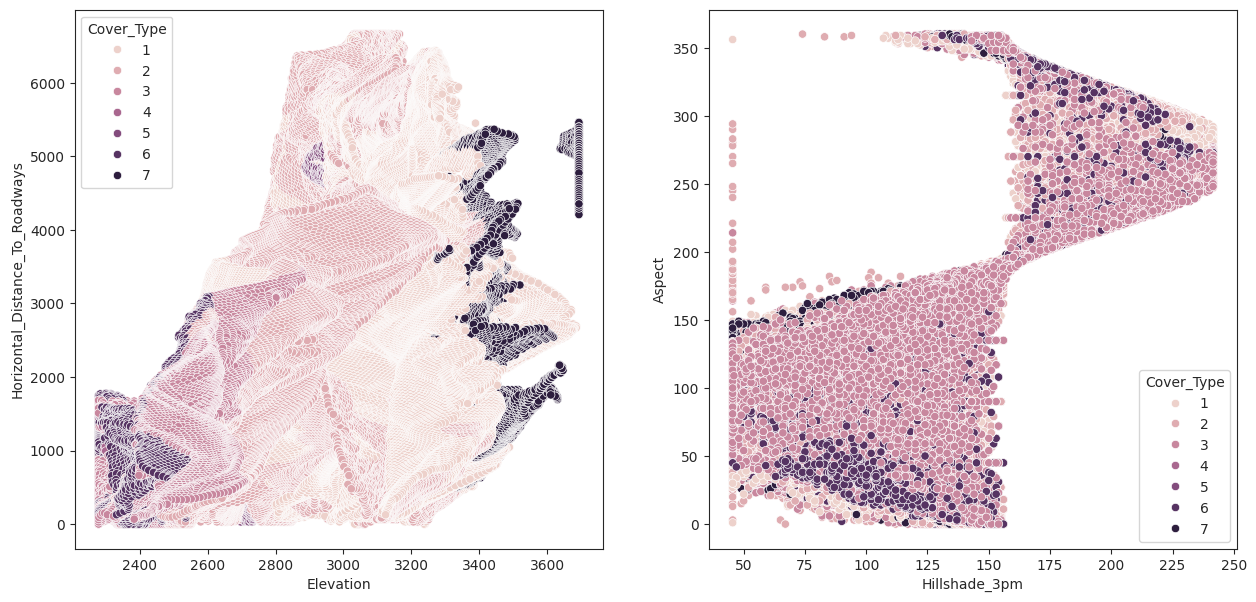

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.scatterplot(data=df_copy,y='Horizontal_Distance_To_Roadways',x='Elevation', hue='Cover_Type')
plt.subplot(122)
sns.scatterplot(data=df_copy,y='Aspect',x='Hillshade_3pm', hue='Cover_Type')
plt.show()

## Handling Imbalanced Target Variable(Cover_Type)

In [40]:
all_features_df["Cover_Type"] = all_features_df["Cover_Type"]-1

In [7]:
all_features_df["Cover_Type"].value_counts()

,count
Cover_Type,
1,283301
0,211840
2,35754
6,20510
5,17367
4,9493
3,2747


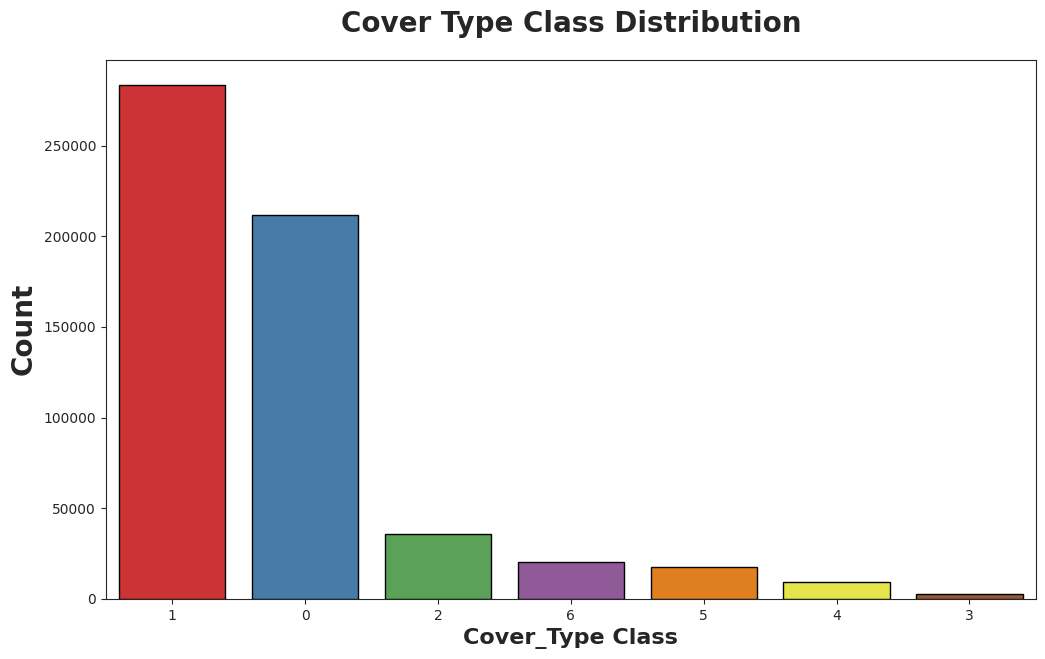

In [44]:
plt.subplots(figsize=(12,7))
sns.countplot(x="Cover_Type", data=all_features_df,ec = "black",palette="Set1",order = all_features_df['Cover_Type'].value_counts().index)
plt.title("Cover Type Class Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Cover_Type Class", weight="bold", fontsize=16)

plt.show()

#### Inference
- As most of the data is of class 0 and class 1 type.
- So its a clear case of imbalaced data

### **Importing ML libraries**

In [2]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [6]:
# machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

# preprocessing functions and evaluation models
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler


In [7]:
def split_and_scale_data(data):
    data = data.copy()

    # Split data in train and test set
    X = data.drop("Cover_Type", axis = 1)
    y = data["Cover_Type"]

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    # Scale data using standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    return X_train, X_test, y_train, y_test

In [8]:
def evaluate_model(model, data_class, X_test, y_test):
    y_pred = model.predict(X_test)

    model_accuracy = accuracy_score(y_pred, y_test)
    print("Accuracy({}):{:.2f}%".format(data_class, model_accuracy*100))

    cm = confusion_matrix(y_test, y_pred)
    cl_report = classification_report(y_test, y_pred)

    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot= True, fmt='g', vmin=0,cbar= False, cmap = 'coolwarm')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    print("Classification Report", cl_report)
    return model_accuracy

In [ ]:
# train test split
X_train, X_test, y_train, y_test = split_and_scale_data(all_features_df) # this is imbalanced_data

In [10]:
  # raw imbalanced data with RandomForest Clf
model_1 = RandomForestClassifier() # RFC
model_1.fit(X_train, y_train)

RandomForestClassifier()

Accuracy(Imbalanced):95.73%


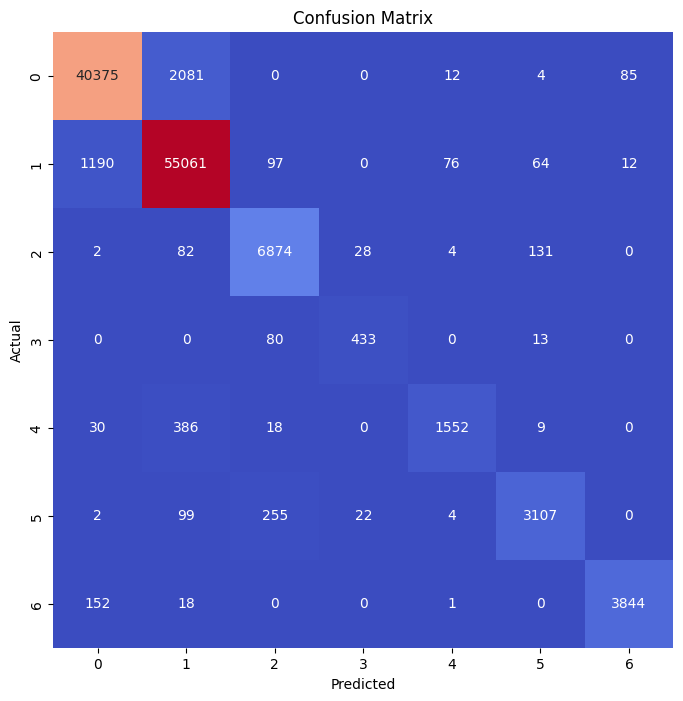

Classification Report               precision    recall  f1-score   support

           0       0.97      0.95      0.96     42557
           1       0.95      0.97      0.96     56500
           2       0.94      0.97      0.95      7121
           3       0.90      0.82      0.86       526
           4       0.94      0.78      0.85      1995
           5       0.93      0.89      0.91      3489
           6       0.98      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.94      0.91      0.92    116203
weighted avg       0.96      0.96      0.96    116203



0.957341893066444

In [14]:
evaluate_model(model_1,"Imbalanced",X_test, y_test)

Accuracy(Imbalanced):71.49%


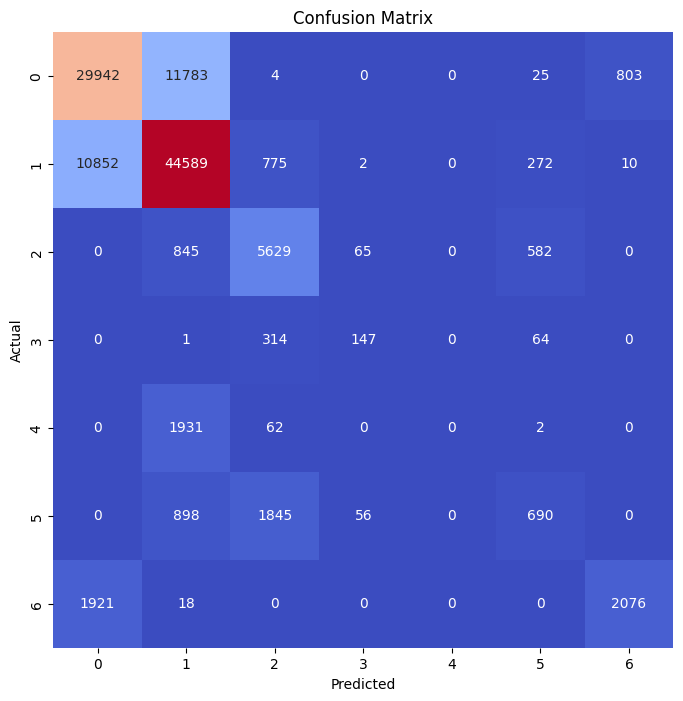

Classification Report               precision    recall  f1-score   support

           0       0.70      0.70      0.70     42557
           1       0.74      0.79      0.77     56500
           2       0.65      0.79      0.71      7121
           3       0.54      0.28      0.37       526
           4       0.00      0.00      0.00      1995
           5       0.42      0.20      0.27      3489
           6       0.72      0.52      0.60      4015

    accuracy                           0.71    116203
   macro avg       0.54      0.47      0.49    116203
weighted avg       0.70      0.71      0.70    116203



0.7148954846260424

In [17]:
# raw imbalanced data with LogisticRegression
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)
evaluate_model(model_2,"Imbalanced",X_test, y_test)

Accuracy(Imbalanced):95.51%


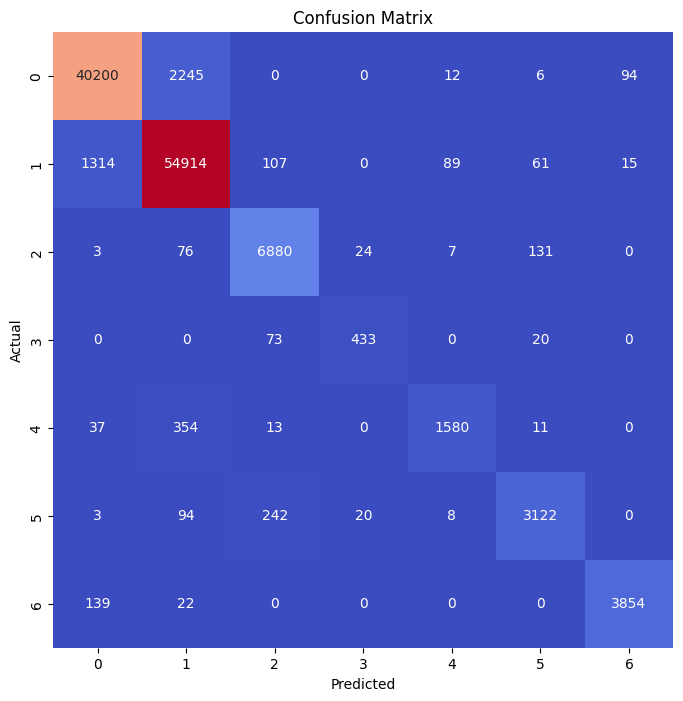

Classification Report               precision    recall  f1-score   support

           0       0.96      0.94      0.95     42557
           1       0.95      0.97      0.96     56500
           2       0.94      0.97      0.95      7121
           3       0.91      0.82      0.86       526
           4       0.93      0.79      0.86      1995
           5       0.93      0.89      0.91      3489
           6       0.97      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.94      0.91      0.92    116203
weighted avg       0.96      0.96      0.95    116203



0.9550786124282505

In [16]:
# raw imbalanced data with ExtraTreesClassifier
model_3 = ExtraTreesClassifier()
model_3.fit(X_train, y_train)
evaluate_model(model_3,"Imbalanced",X_test, y_test)

In [18]:
model_3.predict_proba(X_test)

array([[0.99, 0.  , 0.  , ..., 0.  , 0.  , 0.01],
       [0.17, 0.79, 0.01, ..., 0.03, 0.  , 0.  ],
       [0.01, 0.9 , 0.02, ..., 0.03, 0.04, 0.  ],
       ...,
       [0.13, 0.87, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.18, 0.82, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.08, 0.01, 0.  , ..., 0.  , 0.  , 0.91]])

#### INSIGHTS:
- From above confusion matrix we can observe that most of the true positives and true negatives are from class 1 and Class 2 only.
- We have huge disconnection between over represented classes and under represented classes.

### **1. Random under-sampling**
####  It consists of removing samples from the majority class (under-sampling)

In [29]:
all_features_df['Cover_Type'].value_counts()

,count
Cover_Type,
1,283301
0,211840
2,35754
6,20510
5,17367
4,9493
3,2747


In [21]:
under_sampled_data = all_features_df.copy()

minimum_class_size = np.min(under_sampled_data['Cover_Type'].value_counts().values)
print("Size of smallest class:",minimum_class_size)

Size of smallest class: 2747


#### Undersample the majority class
- We will go through the each class subsets and sample 2747 records.

In [31]:
l = len(under_sampled_data['Cover_Type'].value_counts())
class_subsets = [under_sampled_data.query("Cover_Type == " + str(i)) for i in range(l)]
for i in range(7):
    class_subsets[i] = class_subsets[i].sample(minimum_class_size)
under_sampled_data = pd.concat(class_subsets, axis=0).sample(frac=1.0).reset_index(drop=True)

In [33]:
under_sampled_data['Cover_Type'].value_counts()

,count
Cover_Type,
6,2747
1,2747
0,2747
2,2747
5,2747
3,2747
4,2747


Accuracy(UnderSampling):85.67%


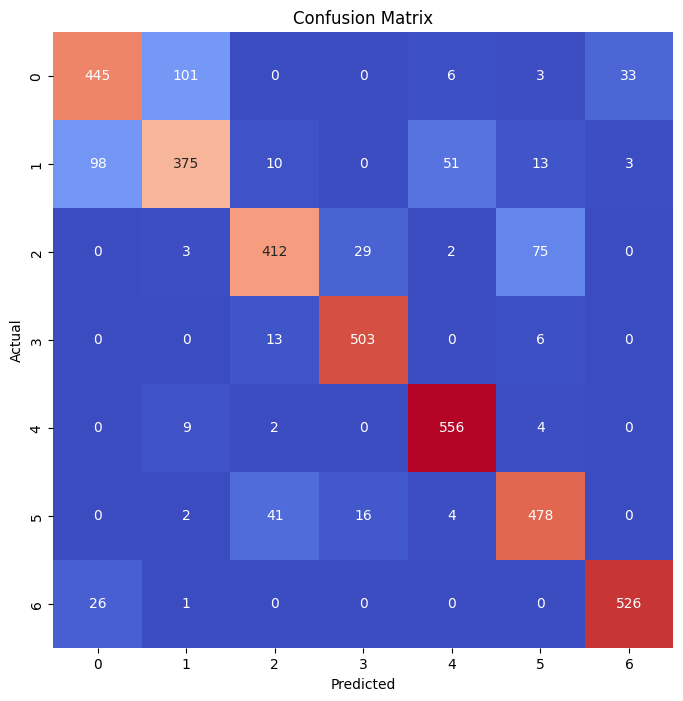

Classification Report               precision    recall  f1-score   support

           0       0.78      0.76      0.77       588
           1       0.76      0.68      0.72       550
           2       0.86      0.79      0.82       521
           3       0.92      0.96      0.94       522
           4       0.90      0.97      0.93       571
           5       0.83      0.88      0.85       541
           6       0.94      0.95      0.94       553

    accuracy                           0.86      3846
   macro avg       0.86      0.86      0.86      3846
weighted avg       0.85      0.86      0.85      3846



0.8567342693707748

In [35]:
X_train, X_test, y_train, y_test = split_and_scale_data(under_sampled_data)

# under sampling data plotting with RF clf
rfc_undersampled = RandomForestClassifier()
rfc_undersampled.fit(X_train, y_train)
evaluate_model(rfc_undersampled,"UnderSampling",X_test, y_test)

Accuracy(UnderSampling):86.38%


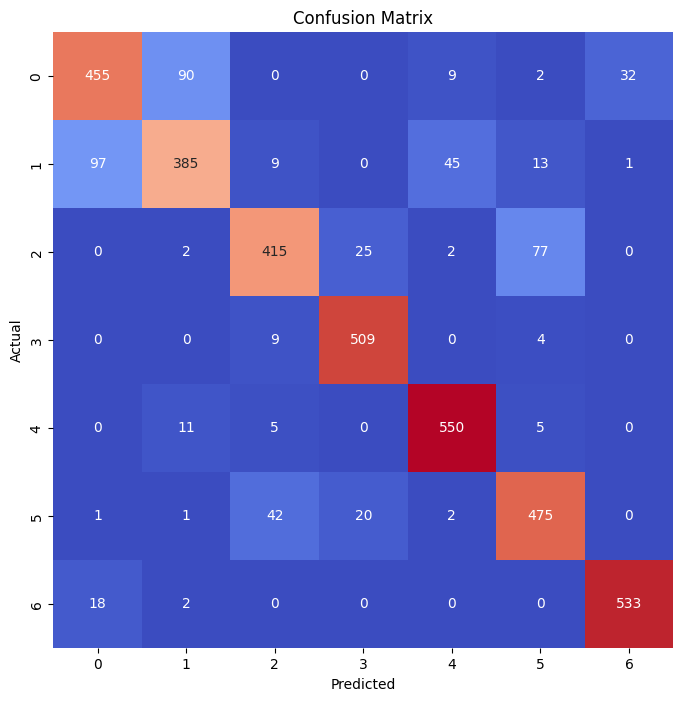

Classification Report               precision    recall  f1-score   support

           0       0.80      0.77      0.79       588
           1       0.78      0.70      0.74       550
           2       0.86      0.80      0.83       521
           3       0.92      0.98      0.95       522
           4       0.90      0.96      0.93       571
           5       0.82      0.88      0.85       541
           6       0.94      0.96      0.95       553

    accuracy                           0.86      3846
   macro avg       0.86      0.86      0.86      3846
weighted avg       0.86      0.86      0.86      3846



0.8637545501820073

In [36]:
# UnderSampling data with ExtraTreesClassifier
xtreeclf_undersampled = ExtraTreesClassifier()
xtreeclf_undersampled.fit(X_train, y_train)
evaluate_model(xtreeclf_undersampled,"UnderSampling",X_test, y_test)

### **2. Random over-sampling**
####   It consists of adding more examples from the minority class (over-sampling).

In [38]:
over_sampled_data = all_features_df.copy()
maximum_class_size = np.max(over_sampled_data['Cover_Type'].value_counts().values)
print("Size of largest class:",maximum_class_size)

Size of largest class: 283301


#### Oversampling the minority class
- We will go through the each class subsets and sample 2747 records.

In [39]:
class_subsets = [over_sampled_data.query("Cover_Type=="+str(i)) for i in range(7)]
for i in range(7):
    class_subsets[i] = class_subsets[i].sample(maximum_class_size, replace=True,random_state=42)
over_sampled_data = pd.concat(class_subsets, axis=0).sample(frac=1.0, random_state=42).reset_index(drop=True)

In [44]:
over_sampled_data.shape # this is actually unrealisticdue to repeating rows

(1983107, 16)

In [41]:
over_sampled_data['Cover_Type'].value_counts()

,count
Cover_Type,
2,283301
6,283301
0,283301
1,283301
4,283301
5,283301
3,283301


Accuracy(OverSampling):99.52%


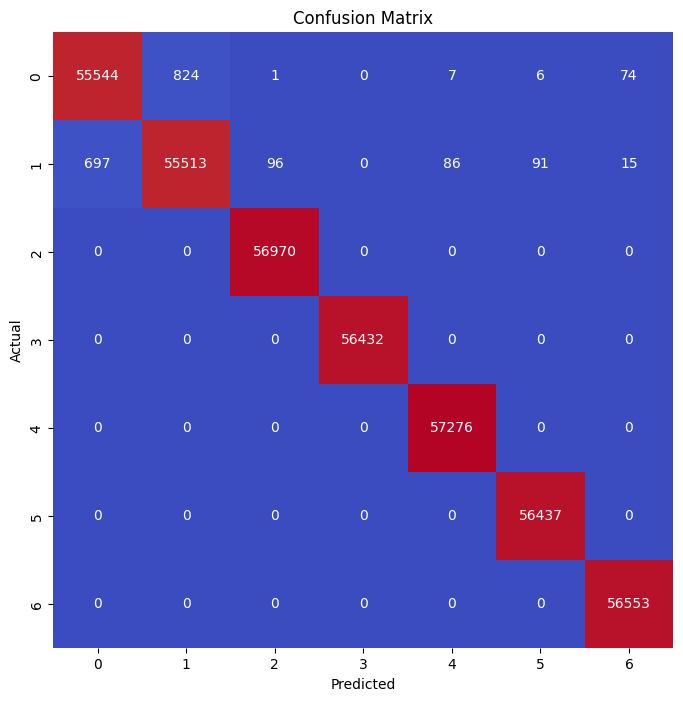

Classification Report               precision    recall  f1-score   support

           0       0.99      0.98      0.99     56456
           1       0.99      0.98      0.98     56498
           2       1.00      1.00      1.00     56970
           3       1.00      1.00      1.00     56432
           4       1.00      1.00      1.00     57276
           5       1.00      1.00      1.00     56437
           6       1.00      1.00      1.00     56553

    accuracy                           1.00    396622
   macro avg       1.00      1.00      1.00    396622
weighted avg       1.00      1.00      1.00    396622



0.9952171084811231

In [45]:
X_train, X_test, y_train, y_test = split_and_scale_data(over_sampled_data)

# evaluating oversampled data with random forest clf
rf_classifier_oversampled = RandomForestClassifier()
rf_classifier_oversampled.fit(X_train, y_train)
evaluate_model(rf_classifier_oversampled,"OverSampling",X_test, y_test)

#### insights:
- we can see 99.5 % of accuracy but it is due to model overfitting

---

## **Lets go with actual imbalanced data**
### Random Forest Classifier

In [13]:
#train test split
X_train, X_test, y_train, y_test = split_and_scale_data(all_features_df)

roc_score 0.998253604267669
Accuracy(Imbalanced_data):95.73%


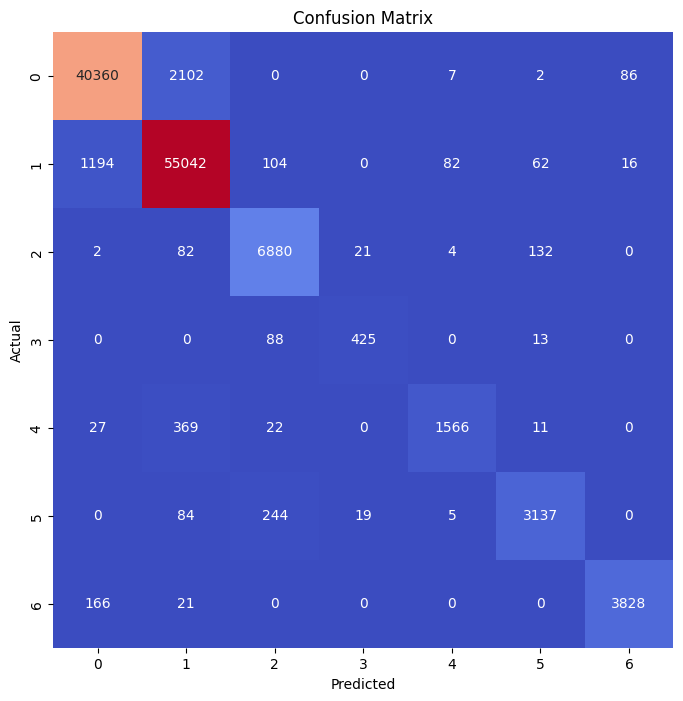

Classification Report               precision    recall  f1-score   support

           0       0.97      0.95      0.96     42557
           1       0.95      0.97      0.96     56500
           2       0.94      0.97      0.95      7121
           3       0.91      0.81      0.86       526
           4       0.94      0.78      0.86      1995
           5       0.93      0.90      0.92      3489
           6       0.97      0.95      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.90      0.92    116203
weighted avg       0.96      0.96      0.96    116203



In [18]:
#
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_prob = rf_classifier.predict_proba(X_test)
rf_roc_auc = roc_auc_score(y_test, y_pred_prob,multi_class="ovr") #Calculate Roc auc score
print("roc_score",rf_roc_auc)
rf_accuracy =  evaluate_model(rf_classifier,"Imbalanced_data",X_test, y_test)

### Extra Trees (Random Forests) Classifier

roc_score 0.9980846272075237
Accuracy(Imbalanced_data):95.53%


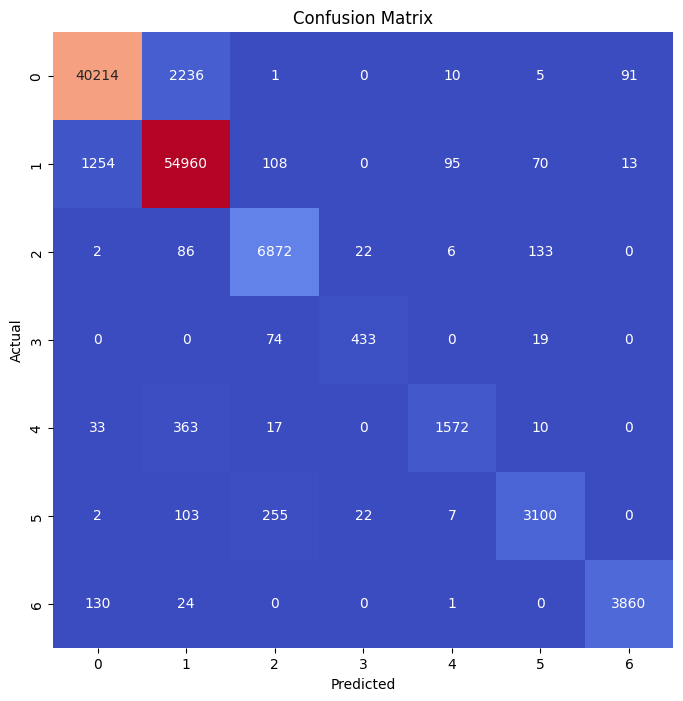

Classification Report               precision    recall  f1-score   support

           0       0.97      0.94      0.96     42557
           1       0.95      0.97      0.96     56500
           2       0.94      0.97      0.95      7121
           3       0.91      0.82      0.86       526
           4       0.93      0.79      0.85      1995
           5       0.93      0.89      0.91      3489
           6       0.97      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.94      0.91      0.92    116203
weighted avg       0.96      0.96      0.96    116203



In [67]:
#
xrf_classifier = ExtraTreesClassifier()
xrf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_prob = xrf_classifier.predict_proba(X_test)
xrf_roc_auc = roc_auc_score(y_test, y_pred_prob,multi_class="ovr") #Calculate Roc auc score
print("roc_score",rf_roc_auc)
xrf_accuracy =  evaluate_model(xrf_classifier,"Imbalanced_data",X_test, y_test)

### K-Neighbors Classifier

roc_score 0.9980846272075237
Accuracy(Imbalanced_data):92.14%


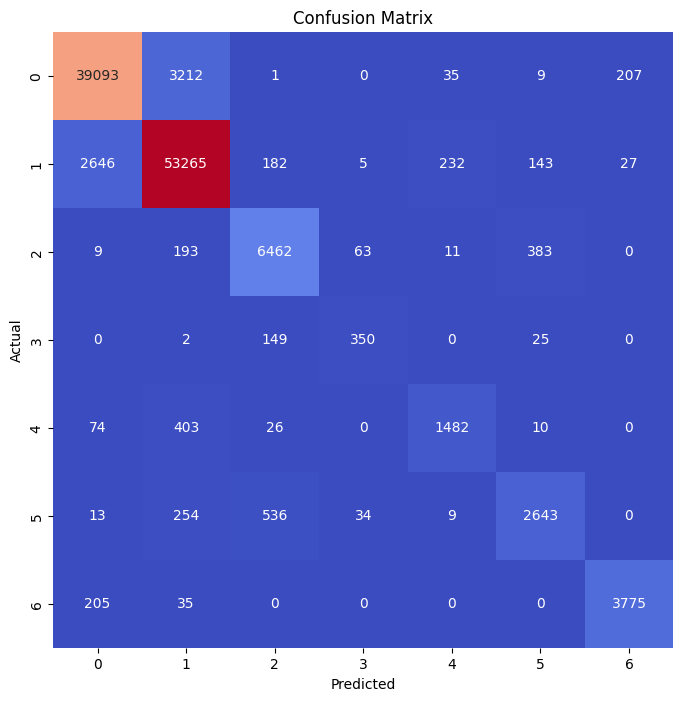

Classification Report               precision    recall  f1-score   support

           0       0.93      0.92      0.92     42557
           1       0.93      0.94      0.94     56500
           2       0.88      0.91      0.89      7121
           3       0.77      0.67      0.72       526
           4       0.84      0.74      0.79      1995
           5       0.82      0.76      0.79      3489
           6       0.94      0.94      0.94      4015

    accuracy                           0.92    116203
   macro avg       0.87      0.84      0.86    116203
weighted avg       0.92      0.92      0.92    116203



In [68]:
#
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train, y_train)

# Make predictions
y_pred_prob = KNN_classifier.predict_proba(X_test)
knn_roc_auc = roc_auc_score(y_test, y_pred_prob,multi_class="ovr") #Calculate Roc auc score
print("roc_score",rf_roc_auc)
knn_accuracy =  evaluate_model(KNN_classifier,"Imbalanced_data",X_test, y_test)

#### Light Gradient Boosting Machine (LightGBM) Classifier

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1971
[LightGBM] [Info] Number of data points in the train set: 464809, number of used features: 15
[LightGBM] [Info] Start training from score -1.010055
[LightGBM] [Info] Start training from score -0.717554
[LightGBM] [Info] Start training from score -2.787067
[LightGBM] [Info] Start training from score -5.343669
[LightGBM] [Info] Start training from score -4.126990
[LightGBM] [Info] Start training from score -3.511322
[LightGBM] [Info] Start training from score -3.338569
roc_score 0.9784850731583712
Accuracy(Imbalanced):85.47%


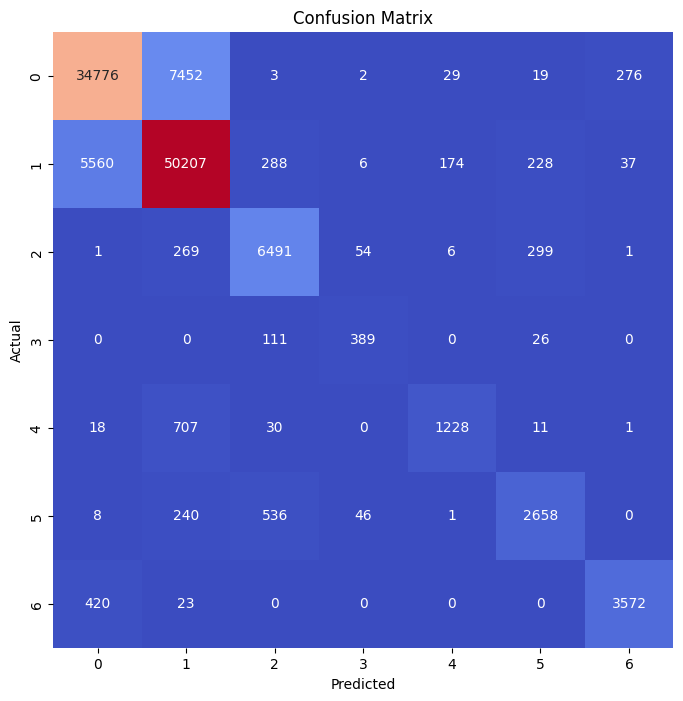

Classification Report               precision    recall  f1-score   support

           0       0.85      0.82      0.83     42557
           1       0.85      0.89      0.87     56500
           2       0.87      0.91      0.89      7121
           3       0.78      0.74      0.76       526
           4       0.85      0.62      0.72      1995
           5       0.82      0.76      0.79      3489
           6       0.92      0.89      0.90      4015

    accuracy                           0.85    116203
   macro avg       0.85      0.80      0.82    116203
weighted avg       0.85      0.85      0.85    116203



In [53]:
# create model apply fit_evaluate_model
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)
# Make predictions
y_pred_prob = lgbm_classifier.predict_proba(X_test)
lgbm_roc_auc = roc_auc_score(y_test, y_pred_prob,multi_class="ovr") #Calculate Roc
print("roc_score",lgbm_roc_auc)
lgbm_accuracy = evaluate_model(lgbm_classifier,"Imbalanced",X_test, y_test)

### Cat Boost Classifiers

roc_score 0.9893063704359581
Accuracy(Imbalanced):88.79%


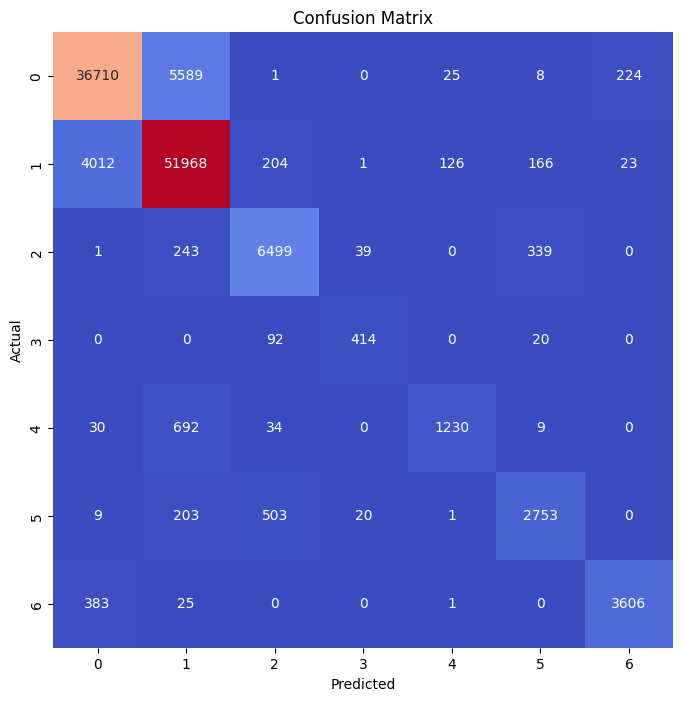

Classification Report               precision    recall  f1-score   support

           0       0.89      0.86      0.88     42557
           1       0.89      0.92      0.90     56500
           2       0.89      0.91      0.90      7121
           3       0.87      0.79      0.83       526
           4       0.89      0.62      0.73      1995
           5       0.84      0.79      0.81      3489
           6       0.94      0.90      0.92      4015

    accuracy                           0.89    116203
   macro avg       0.89      0.83      0.85    116203
weighted avg       0.89      0.89      0.89    116203



In [54]:
# create model apply fit_evaluate_model
cat_classifier = CatBoostClassifier(verbose=False)
cat_classifier.fit(X_train, y_train)
# Make predictions
y_pred_prob = cat_classifier.predict_proba(X_test)
cat_roc_auc = roc_auc_score(y_test, y_pred_prob,multi_class="ovr") #Calculate Roc
print("roc_score",cat_roc_auc)
cat_accuracy = evaluate_model(cat_classifier,"Imbalanced",X_test, y_test)

### XGBoost Classifier

roc_score 0.9893063704359581
Accuracy(Imbalanced):87.94%


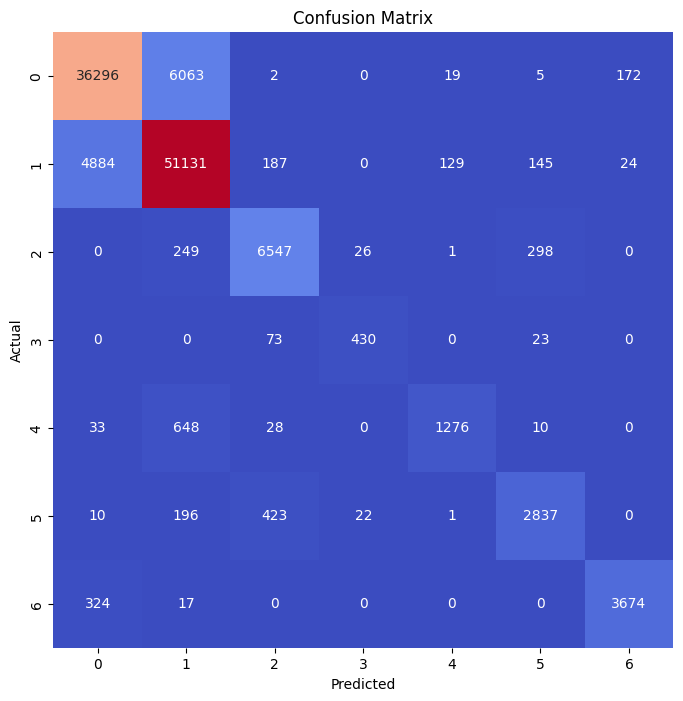

Classification Report               precision    recall  f1-score   support

           0       0.87      0.85      0.86     42557
           1       0.88      0.90      0.89     56500
           2       0.90      0.92      0.91      7121
           3       0.90      0.82      0.86       526
           4       0.89      0.64      0.75      1995
           5       0.86      0.81      0.83      3489
           6       0.95      0.92      0.93      4015

    accuracy                           0.88    116203
   macro avg       0.89      0.84      0.86    116203
weighted avg       0.88      0.88      0.88    116203



In [63]:
# create model apply fit_evaluate_model
xgb_classifier = XGBClassifier(verbose=False)
xgb_classifier.fit(X_train, y_train)
# Make predictions
y_pred_prob = xgb_classifier.predict_proba(X_test)
xgb_roc_auc = roc_auc_score(y_test, y_pred_prob,multi_class="ovr") #Calculate Roc
print("roc_score",cat_roc_auc)
xgb_accuracy = evaluate_model(xgb_classifier,"Imbalanced",X_test, y_test)

## **Evaluate all base Models**

Text(0.5, 1.0, 'Accuracy Score of Different Models')

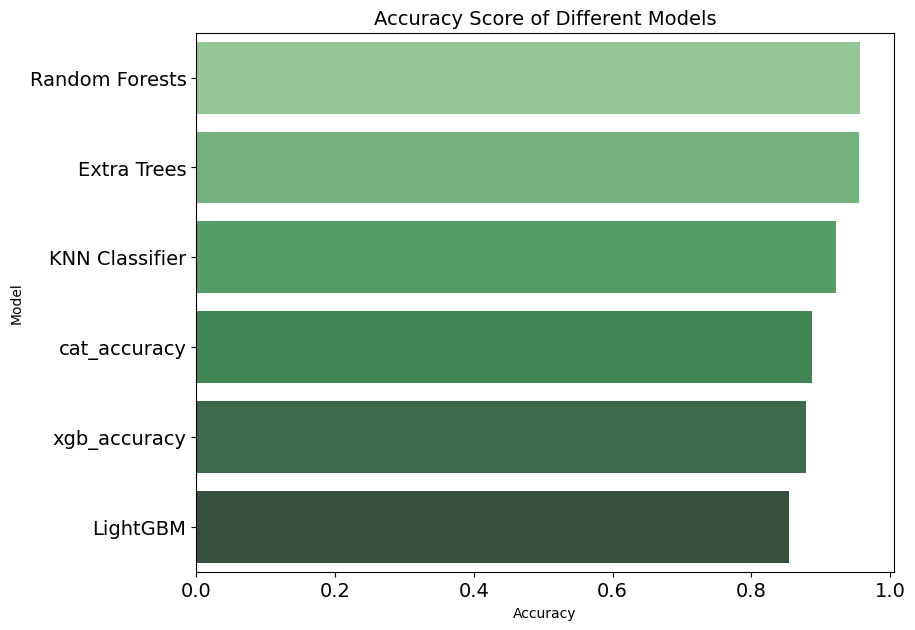

In [73]:
# create dataframe of accuracy and model and sort values
performance_comparison = pd.DataFrame({"Model": [ "LightGBM", "Random Forests","KNN Classifier", "Extra Trees","cat_accuracy","xgb_accuracy"],
                                       "Accuracy": [ lgbm_accuracy, rf_accuracy,knn_accuracy, xrf_accuracy,cat_accuracy,xgb_accuracy]})

performance_comparison = performance_comparison.sort_values(by="Accuracy", ascending=False)

# set the plot
plt.figure(figsize=(9,7))
ax = sns.barplot(x="Accuracy", y="Model", data=performance_comparison, palette="Greens_d")

# set title arrange labels
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Accuracy Score of Different Models", size=14)


In [74]:
performance_comparison

,Model,Accuracy
1,Random Forests,0.957264
3,Extra Trees,0.955320
2,KNN Classifier,0.921405
4,cat_accuracy,0.887929
5,xgb_accuracy,0.879418
0,LightGBM,0.854720


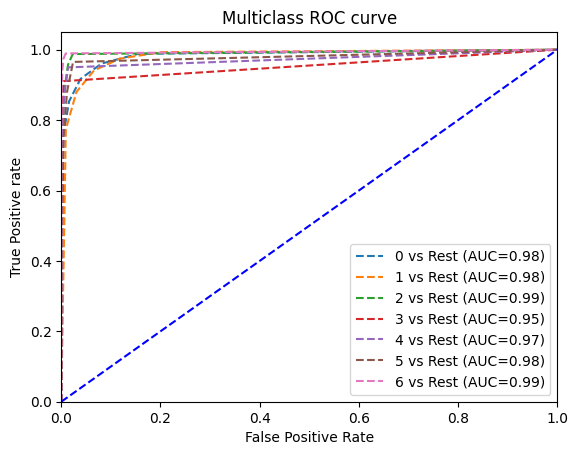

In [75]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
#binarize the y_values

classes=np.unique(y_test)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 7

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

### Best Model is **Random Forest** Classifier with 95.72 % Accuracy, hence we can save this model

In [20]:
import pickle

# Save the trained model as a pickle file.
pickle.dump(rf_classifier, open('RandomForest_clf.pkl', 'wb'))